# Define an oscillatory function in Python to describe the intra- and inter-day variations in the tide.

Using the scipy library, fit the oscillatory function to the data assuming the root mean squared experimental error on the height of the tide is 0.25 ft. Document these steps in the Jupyter notebook, and graph both the model and the data on the same plot. Label the data, provide sufficient labeling of the axes to provide clarity, and have the notebook save the figure to a PDF.

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import scipy as sp
%matplotlib inline

In [94]:
def oscilloscope(time, diurnal, semidiurnal, diamp, semiamp, amplitude):
    diurnalcycle = diamp*np.cos(time/diurnal)
    semicycle = semiamp*np.cos(time/semidiurnal)
    return(amplitude*diurnalcycle*semicycle)

timesample = np.linspace(1, 1000, 985)

In [89]:
from astropy.io import ascii #ascii plain text i/o
given_data = ascii.read('ASTR19_F23_group_project_data.txt') #read the data in a new table

given_time = []
given_tide = []
for n in given_data:
    hoursmin = (n[1]).split(":")
    hours = float(hoursmin[0])
    min = float(hoursmin[1])
    day = float(n[0])-1
    given_time = given_time+[(day*24)+hours+(min/60)]
    given_tide = given_tide+[float(n[2])]

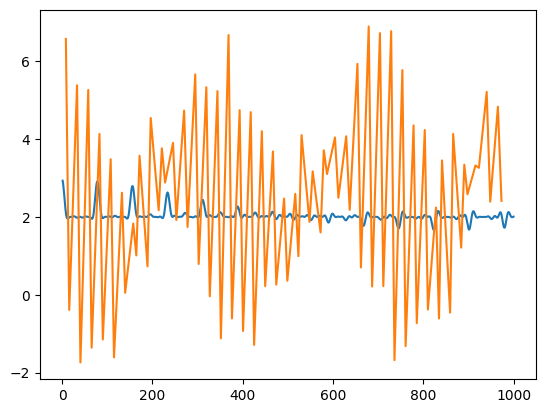

In [80]:
plt.plot(timesamples, tidesamples, label=('Modeled'))
plt.plot(given_time, given_tide, label='Actual')


In [95]:
sp.optimize.curve_fit(oscilloscope, given_time, given_tide)

(array([1.00015352, 1.00015308, 1.5959729 , 1.84986119, 1.22741099]),
 array([[ 5.14415661e+02, -5.14413939e+02, -6.76869200e+07,
         -5.29332388e+06,  5.55680120e+07],
        [-5.14413939e+02,  5.14412216e+02,  6.76862961e+07,
          5.29347410e+06, -5.55676319e+07],
        [-6.76869200e+07,  6.76862961e+07,  1.81416376e+15,
         -5.17941454e+14, -1.05155248e+15],
        [-5.29332388e+06,  5.29347410e+06, -5.17941454e+14,
          1.37371336e+15, -5.13147686e+14],
        [ 5.55680120e+07, -5.55676319e+07, -1.05155248e+15,
         -5.13147686e+14,  1.14919618e+15]]))

In [ ]:
tidesamples = oscilloscope()